In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
# Data loading
file_path = Path("Resources/myopia.csv")
df = pd.read_csv(file_path)
df.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0,0


In [3]:
#Data Preparation
df= df.drop("MYOPIC",axis=1)

#Standardising dataset
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [4]:
#Apply Dimensionality Reduction.

# Initialise PCA model
pca = PCA(n_components=0.90)

# Get two principal components for the data.
#df_pca = pca.fit_transform(df)

#Usind standardise data
df_pca = pca.fit_transform(X)

In [5]:
# Transform PCA data to a DataFrame
# df_myopia_pca = pd.DataFrame(
#     data=df_pca, columns=["principal component 1", "principal component 2","principal component 3"]
# )
# df_myopia_pca.head()

df_myopia_pca = pd.DataFrame(
     data=df_pca
 )
df_myopia_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [6]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

C:\Users\61412\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


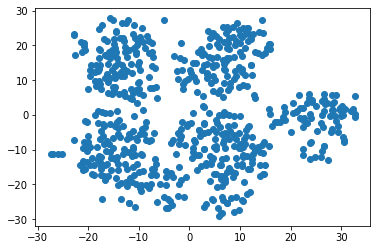

In [7]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2, verbose=1, random_state=123)
# z = tsne.fit_transform(df_myopia_pca) 

tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(df_myopia_pca)
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()



In [8]:
inertia=[]
k= list(range(1,11))
for i in k:
    kmeans= KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)
print(inertia)   

C:\Users\61412\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


[7948.905345362219, 6794.41569488761, 6031.097741712554, 5662.587617074271, 5376.410589271983, 5149.524688078292, 4925.071941251317, 4756.274759904935, 4596.931418241587, 4483.5399180390705]


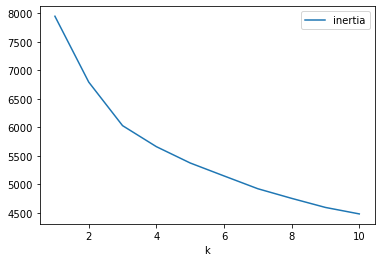

In [9]:
# Create an elbow plot
elbow_df = pd.DataFrame({'k': k, 'inertia': inertia})
elbow_df.plot.line(x='k', y='inertia')
plt.show()

### Conclusion
The optimal value for k=3.2. So we can conclude that the optimal number if clusters are 3